# 緑本

## 2章

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyper as pr
import scipy.stats as sct

In [2]:
import rdata
parsed = rdata.parser.parse_file('./kubobook_2012/distribution/data.RData')
converted = rdata.conversion.convert(parsed)
data = pd.Series(converted.get('data'), dtype = int)
data

/Users/aokikento/.pyenv/versions/3.8.5/lib/python3.8/site-packages/rdata/conversion/_conversion.py:210: UserWarning: Unknown encoding. Assumed ASCII.
  warnings.warn(f"Unknown encoding. Assumed ASCII.")


0     2
1     2
2     4
3     6
4     4
5     5
6     2
7     3
8     1
9     2
10    0
11    4
12    3
13    3
14    3
15    3
16    4
17    2
18    7
19    2
20    4
21    3
22    3
23    3
24    4
25    3
26    7
27    5
28    3
29    1
30    7
31    6
32    4
33    6
34    5
35    2
36    4
37    7
38    2
39    2
40    6
41    2
42    4
43    5
44    4
45    5
46    1
47    3
48    2
49    3
dtype: int64

In [3]:
len(data)

50

In [4]:
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
dtype: float64

In [5]:
np.histogram(data, bins=7)

(array([ 1,  3, 11, 12, 10,  5,  8]), array([0., 1., 2., 3., 4., 5., 6., 7.]))

Text(0.5, 1.0, 'Histogram of data')

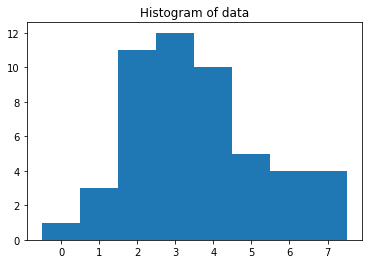

In [6]:
plt.hist(data, bins=np.arange(-0.5, 8.5, 1))
plt.title('Histogram of data')

In [7]:
data.var()

2.986122448979592

In [8]:
import math
data.std(), math.sqrt(data.var())

(1.728040060004279, 1.728040060004279)

In [9]:
y = range(10)
prob = sct.poisson.pmf(y, mu=3.56)
prob

array([0.02843882, 0.10124222, 0.18021114, 0.21385056, 0.190327  ,
       0.13551282, 0.08040427, 0.04089132, 0.01819664, 0.00719778])

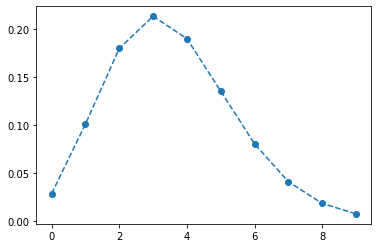

In [10]:
plt.plot(y, prob, 'o--')

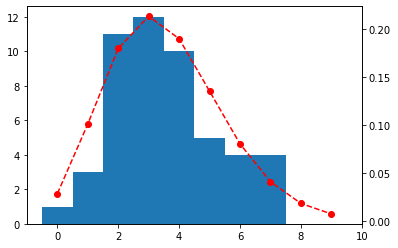

In [11]:
fig, ax1 = plt.subplots()
ax1.hist(data,bins=[i-0.5 for i in range(11)])
ax2 = ax1.twinx()
ax2.plot(y,prob,'ro--')

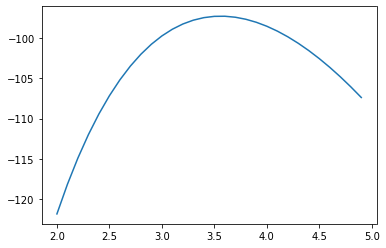

In [12]:
logL = lambda m: sum(sct.poisson.logpmf(data, m))
x = np.arange(2,5,0.1)
logL_list = [logL(m) for m in x]
plt.plot(x,logL_list)

(array([ 1.,  7.,  7.,  9., 11.,  8.,  6.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

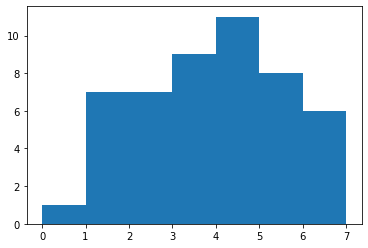

In [13]:
a = np.random.poisson(lam=3.5, size=50)
d = pd.Series(a)
plt.hist(d, bins=np.arange(d.max()- 0.5))

(array([  0.,   2.,  13.,  25.,  60., 126., 202., 296., 381., 407., 424.,
        405., 297., 172., 103.,  47.,  21.,  14.,   4.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
        3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4]),
 <BarContainer object of 19 artists>)

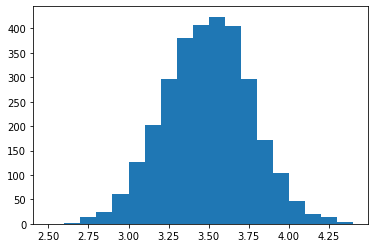

In [14]:
count = []
for _ in range(3000):
    a = np.random.poisson(lam=3.5,size = 50)
    count.append(a.mean())
plt.hist(count,bins=np.arange(2.5,4.5,0.1))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,   25.,  336.,
        1157., 1138.,  321.,   23.,    0.,    0.,    0.,    0.,    0.,
           0.]),
 array([2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7,
        3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4]),
 <BarContainer object of 19 artists>)

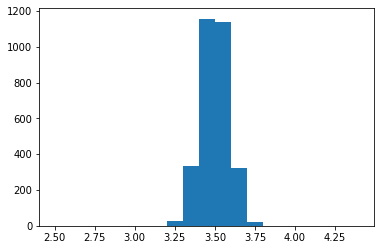

In [15]:
count = []
for _ in range(3000):
    a = np.random.poisson(lam=3.5,size = 500)
    count.append(a.mean())
plt.hist(count,bins=np.arange(2.5,4.5,0.1))

## 3章 一般化線型モデル

In [16]:
data = pd.read_csv('./kubobook_2012/poisson/data3a.csv', dtype={'y':int, 'x':float, 'f':'category'})
data

,y,x,f
0,6,8.31,C
1,6,9.44,C
2,6,9.50,C
3,12,9.07,C
4,10,10.16,C
...,...,...,...
95,8,9.15,T
96,6,8.52,T
97,8,10.24,T
98,7,10.86,T


In [17]:
data.shape

(100, 3)

In [18]:
data.x.head()

0     8.31
1     9.44
2     9.50
3     9.07
4    10.16
Name: x, dtype: float64

In [19]:
data.describe()

,y,x
count,100.000000,100.000000
mean,7.830000,10.089100
std,2.624881,1.008049
min,2.000000,7.190000
25%,6.000000,9.427500
50%,8.000000,10.155000
75%,10.000000,10.685000
max,15.000000,12.400000


In [20]:
data.f.describe()

count     100
unique      2
top         T
freq       50
Name: f, dtype: object

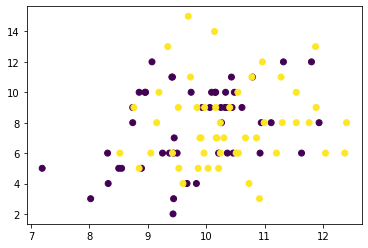

In [25]:
plt.scatter(data.x, data.y, c = data.f.cat.codes)

<AxesSubplot:title={'center':'y'}, xlabel='f'>

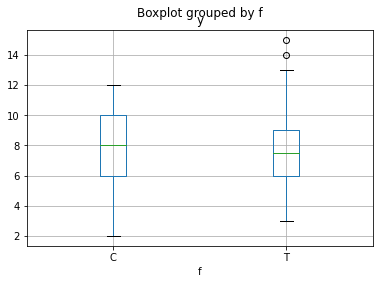

In [22]:
data.boxplot(column='y',by='f')

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.glm('y ~ x', data=data,family = sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Wed, 30 Dec 2020   Deviance:                       84.993
Time:                        09:44:12   Pearson chi2:                     83.8
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2917      0.364      3.552      0.000       0.579       2.005
x              0.0757      0.036      2.125      0.034       0.006       0.145
==============================================================================
"""

In [31]:
result.llf # llf: log likelihood

-235.3862507698608

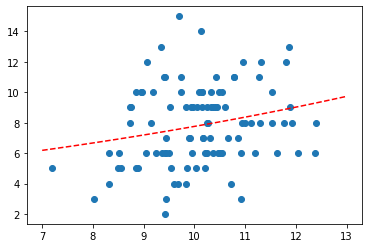

In [32]:
x = np.linspace(7,13,100)
y = np.exp(result.params['Intercept'] + x*result.params['x'])

plt.scatter(data.x, data.y)
plt.plot(x,y,'r--')